## EDA

In [1]:
# import initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

### Load in data

In [2]:
df = pd.read_csv('data/zillow_data.csv')

### Inspecting data

In [3]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [4]:
df.dtypes

RegionID       int64
RegionName     int64
City          object
State         object
Metro         object
               ...  
2017-12        int64
2018-01        int64
2018-02        int64
2018-03        int64
2018-04        int64
Length: 272, dtype: object

In [5]:
df.isna().any().value_counts()

True     220
False     52
dtype: int64

## Clean Data

In [6]:
# RegionID is something from Zillow, don't need it
df.drop('RegionID', axis=1,inplace=True)

### Clean up column names

In [7]:
df.columns = df.columns.str.strip().str.lower()

In [8]:
df['zipcode'] = df['regionname']
df['size_rank'] = df['sizerank']
df['county'] = df['countyname']
df.drop(['regionname', 'sizerank', 'countyname'],axis=1,inplace=True)
df

,city,state,metro,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,zipcode,size_rank,county
0,Chicago,IL,Chicago,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,...,1009600,1013300,1018700,1024400,1030700,1033800,1030600,60657,1,Cook
1,McKinney,TX,Dallas-Fort Worth,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,...,314100,315000,316600,318100,319600,321100,321800,75070,2,Collin
2,Katy,TX,Houston,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,...,320400,320800,321200,321200,323000,326900,329900,77494,3,Harris
3,Chicago,IL,Chicago,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,...,1291500,1296600,1299000,1302700,1306400,1308500,1307000,60614,4,Cook
4,El Paso,TX,El Paso,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,...,120300,120300,120300,120300,120500,121000,121500,79936,5,El Paso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,Ashfield,MA,Greenfield Town,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,...,218500,218100,216400,213100,209800,209200,209300,1338,14719,Franklin
14719,Woodstock,NH,Claremont,92700.0,92500.0,92400.0,92200.0,92100.0,91900.0,91700.0,...,215200,214300,213100,213700,218300,222700,225800,3293,14720,Grafton
14720,Berea,KY,Richmond,57100.0,57300.0,57500.0,57700.0,58000.0,58200.0,58400.0,...,126700,128800,130600,131700,132500,133000,133400,40404,14721,Madison
14721,Mount Crested Butte,CO,NaN,191100.0,192400.0,193700.0,195000.0,196300.0,197700.0,199100.0,...,695600,695500,694700,706400,705300,681500,664400,81225,14722,Gunnison


### Adding statistical columns

In [9]:
#Calculate historical return on investment
df['roi'] = (df['2018-04']/df['1996-04'])-1
#Calculate standard deviation of monthly values
df['std']=df.loc[:,'1996-04':'2018-04'].std(skipna=True, axis=1)
#Calculate historical mean value
df['mean']=df.loc[:,'1996-04':'2018-04'].mean(skipna=True, axis=1)
#Calculate historical median value
df['median']=df.loc[:,'1996-04':'2018-04'].median(skipna=True,axis=1)
#Calculate coefficient of variance
df['cv']=df['std']/df['mean']
#Show calculated values
df[['zipcode','std','mean','roi','cv']].head()

upper_cv = df.cv.quantile(.75)
print(f'\nCV upper limit: {upper_cv}')

#Get the 5 zipcodes with highest ROIs within the firms risk profile.
zc_best5 = df[df['cv']<upper_cv].sort_values('roi',axis=0,ascending=False)[:5]
print('\n Best 5 Zipcodes on raw historical ROI scores:')
zc_best5[['zipcode','roi','cv', 'city', 'state']]


CV upper limit: 0.27686411291010293

 Best 5 Zipcodes on raw historical ROI scores:


,zipcode,roi,cv,city,state
10905,15681,4.594444,0.255833,Loyalhanna,PA
11449,16023,3.915212,0.274544,Winfield,PA
10658,16056,3.827830,0.269526,Clinton,PA
9178,16055,3.576659,0.270178,Buffalo,PA
9721,15627,3.482234,0.276190,Derry,PA


### Melt data

In [10]:
# we want to keep certain cols and get the years + dates
def melt_data(df):
    melted = pd.melt(df, id_vars=['zipcode', 'state', 'city', 'metro', 'size_rank', 'county', 'roi', 'cv','mean','median','std'], var_name='date')
    melted['date'] = pd.to_datetime(melted['date'], infer_datetime_format=True)
    melted['year'] = [d.year for d in melted.date]
    melted = melted.dropna(subset=['value'])
    return melted

In [11]:
df = melt_data(df)

In [12]:
df

,zipcode,state,city,metro,size_rank,county,roi,cv,mean,median,std,date,value,year
0,60657,IL,Chicago,Chicago,1,Cook,2.083782,0.256487,743978.867925,775600.0,190821.103965,1996-04-01,334200.0,1996
1,75070,TX,McKinney,Dallas-Fort Worth,2,Collin,0.365295,0.152680,219655.849057,205900.0,33537.101427,1996-04-01,235700.0,1996
2,77494,TX,Katy,Houston,3,Harris,0.567966,0.143950,262110.566038,249700.0,37730.794353,1996-04-01,210400.0,1996
3,60614,IL,Chicago,Chicago,4,Cook,1.623971,0.237364,974139.245283,1006300.0,231225.944628,1996-04-01,498100.0,1996
4,79936,TX,El Paso,El Paso,5,El Paso,0.571798,0.178326,101875.471698,112400.0,18167.079218,1996-04-01,77300.0,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901590,1338,MA,Ashfield,Greenfield Town,14719,Franklin,1.212474,0.232707,165064.150943,182800.0,38411.628676,2018-04-01,209300.0,2018
3901591,3293,NH,Woodstock,Claremont,14720,Grafton,1.435814,0.303073,162661.886792,182000.0,49298.400500,2018-04-01,225800.0,2018
3901592,40404,KY,Berea,Richmond,14721,Madison,1.336252,0.182705,97273.584906,104400.0,17772.324320,2018-04-01,133400.0,2018
3901593,81225,CO,Mount Crested Butte,NaN,14722,Gunnison,2.476714,0.282105,483997.358491,525200.0,136538.282291,2018-04-01,664400.0,2018


### Datetime as index

In [13]:
# setting our 'date' col which is in DateTime to Index
df.set_index(df['date'],inplace=True)
df.drop('date', axis=1, inplace=True)

In [14]:
# inspecting the date range of the full dataset
df_range = pd.Timedelta((df.index.max()-df.index.min()),unit='days')

print('earliest date:', df.index.min(),'\n\n','most recent date:', df.index.max(),'\n\n a range of', str(df_range)[:9],
     'or', round(8035/365.25, 2), 'years.')

earliest date: 1996-04-01 00:00:00 

 most recent date: 2018-04-01 00:00:00 

 a range of 8035 days or 22.0 years.


## Some quick looks

In [15]:
# how many total zipcodes in this 3.7m record dataset?
df_zips = df['zipcode'].unique()
len(df_zips)

14723

In [16]:
df_prices = pd.DataFrame(df['value'])
df_prices.head()

,value
date,
1996-04-01,334200.0
1996-04-01,235700.0
1996-04-01,210400.0
1996-04-01,498100.0
1996-04-01,77300.0


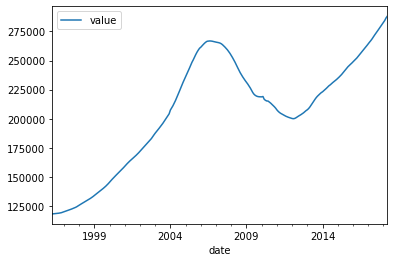

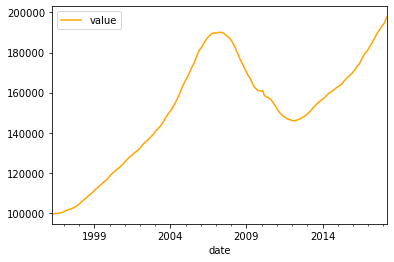

In [17]:
avg_prices = df_prices.groupby('date').aggregate({'value':'mean'})
median_prices = df_prices.groupby('date').aggregate({'value': 'median'})
avg_prices.plot()
median_prices.plot(c='orange');

Although the mean numbers are higher than median, the trend is about the same.

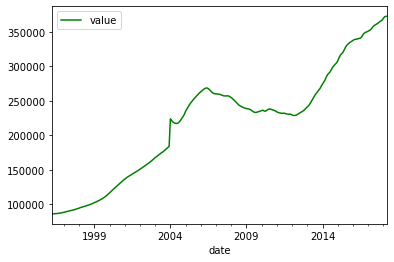

In [18]:
std_prices = df_prices.groupby('date').aggregate({'value':'std'})
std_prices.plot(c='green');

## Looking at ChiTown data

To get some idea of the data we're working with, let's see what's up with Chicago.

In [19]:
chi = df[df['city'] == 'Chicago']
chi

,zipcode,state,city,metro,size_rank,county,roi,cv,mean,median,std,value,year
date,,,,,,,,,,,,,
1996-04-01,60657,IL,Chicago,Chicago,1,Cook,2.083782,0.256487,743978.867925,775600.0,190821.103965,334200.0,1996
1996-04-01,60614,IL,Chicago,Chicago,4,Cook,1.623971,0.237364,974139.245283,1006300.0,231225.944628,498100.0,1996
1996-04-01,60640,IL,Chicago,Chicago,8,Cook,2.615704,0.302850,553078.867925,585900.0,167499.870439,216500.0,1996
1996-04-01,60647,IL,Chicago,Chicago,17,Cook,2.832111,0.332313,293135.471698,302500.0,97412.855511,122700.0,1996
1996-04-01,60618,IL,Chicago,Chicago,20,Cook,2.255961,0.303729,316441.132075,328900.0,96112.225708,142600.0,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-01,60656,IL,Chicago,Chicago,3157,Cook,0.828022,0.229503,263675.094340,265200.0,60514.191161,304000.0,2018
2018-04-01,60655,IL,Chicago,Chicago,3961,Cook,0.850438,0.225908,192772.830189,199700.0,43548.942529,232600.0,2018
2018-04-01,60646,IL,Chicago,Chicago,4041,Cook,1.033958,0.222924,333294.716981,340600.0,74299.319724,401300.0,2018


In [20]:
chi_zips = chi['zipcode'].unique()
chi_zips

array([60657, 60614, 60640, 60647, 60618, 60613, 60629, 60625, 60619,
       60610, 60620, 60634, 60626, 60649, 60616, 60622, 60615, 60641,
       60660, 60608, 60638, 60639, 60630, 60643, 60632, 60605, 60645,
       60651, 60653, 60654, 60612, 60607, 60659, 60652, 60631, 60656,
       60655, 60646, 60642, 60633, 60611], dtype=int64)

In [21]:
chi_counties = chi['county'].unique()
chi_counties

array(['Cook'], dtype=object)

In [22]:
# looking at the housing IQR over time
chi_25 = chi['value'].quantile(.25)
chi_75 = chi['value'].quantile(.75)
print(f"""Chicago's houses for the most part fall between
${chi_25} and ${chi_75}""")

Chicago's houses for the most part fall between
$162125.0 and $416100.0


In [23]:
# making sure Chicago's timeframe matches too
chi_range = pd.Timedelta((chi.index.max()-chi.index.min()),unit='days')
print('earliest date:', chi.index.min(),'\n\n','most recent date:', chi.index.max(),'\n\n a range of', str(chi_range)[:9],
     'or', round(8035/365.25, 2), 'years.')

earliest date: 1996-04-01 00:00:00 

 most recent date: 2018-04-01 00:00:00 

 a range of 8035 days or 22.0 years.


In [24]:
# any nulls?
chi.isna().any()

zipcode      False
state        False
city         False
metro        False
size_rank    False
county       False
roi           True
cv           False
mean         False
median       False
std          False
value        False
year         False
dtype: bool

In [25]:
chi.roi.isna().sum()

58

### Some basic plotting

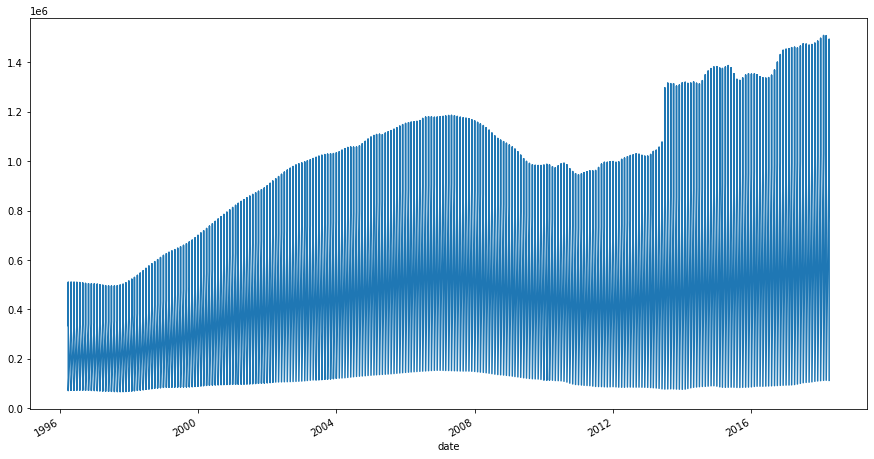

In [26]:
chi['value'].plot(figsize=(15,8));

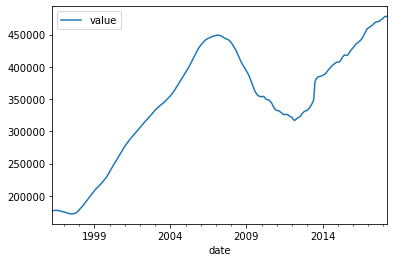

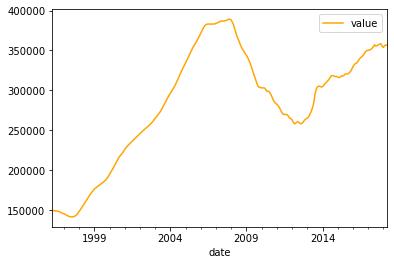

In [27]:
chicago_pricing = pd.DataFrame(chi['value'])
chicago_mean = chicago_pricing.groupby('date').aggregate({'value':'mean'}).plot()
chicago_median = chicago_pricing.groupby('date').aggregate({'value':'median'}).plot(c='orange');

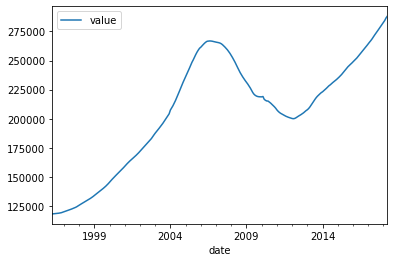

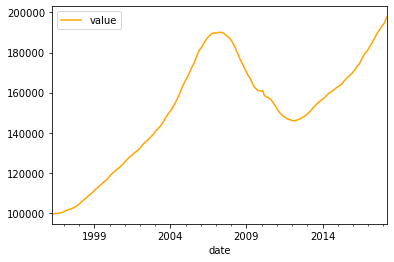

In [28]:
# reminder of what the full df looks like
avg_prices.plot()
median_prices.plot(c='orange');

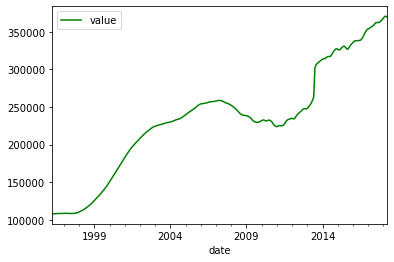

In [29]:
chicago_std = chi.groupby('date').aggregate({'value':'std'})
chicago_std.plot(c='green');

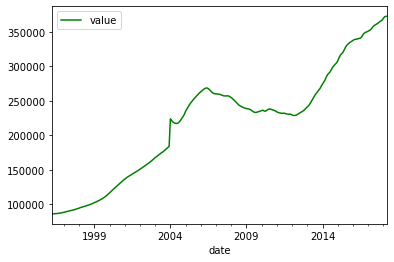

In [30]:
std_prices.plot(c='green');

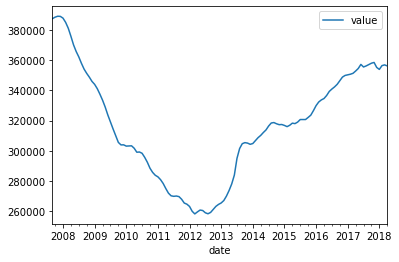

In [31]:
chicago_post_crash = chi['2007-09-01':]
chicago_post_crash['value']
chicago_08 = chicago_post_crash.groupby('date').aggregate({'value':'median'})
chicago_08.plot();

### Chicago Augmented Dicky-Fuller

In [32]:
def stationarity_check(df):
    roll_mean = df.rolling(window=12, center=False).mean()
    roll_std = df.rolling(window=12, center=False).std()
    
    df_test = adfuller(df)
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in df_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    roll_mean.plot()
    roll_std.plot()
    return df_test

In [33]:
chi.head()

,zipcode,state,city,metro,size_rank,county,roi,cv,mean,median,std,value,year
date,,,,,,,,,,,,,
1996-04-01,60657,IL,Chicago,Chicago,1,Cook,2.083782,0.256487,743978.867925,775600.0,190821.103965,334200.0,1996
1996-04-01,60614,IL,Chicago,Chicago,4,Cook,1.623971,0.237364,974139.245283,1006300.0,231225.944628,498100.0,1996
1996-04-01,60640,IL,Chicago,Chicago,8,Cook,2.615704,0.302850,553078.867925,585900.0,167499.870439,216500.0,1996
1996-04-01,60647,IL,Chicago,Chicago,17,Cook,2.832111,0.332313,293135.471698,302500.0,97412.855511,122700.0,1996
1996-04-01,60618,IL,Chicago,Chicago,20,Cook,2.255961,0.303729,316441.132075,328900.0,96112.225708,142600.0,1996


Results of Dickey-Fuller Test: 

Test Statistic                    -3.197103
p-value                            0.020153
#Lags Used                        39.000000
Number of Observations Used    10618.000000
Critical Value (1%)               -3.430966
Critical Value (5%)               -2.861812
Critical Value (10%)              -2.566915
dtype: float64


(-3.197102530204559,
 0.020153009937494012,
 39,
 10618,
 {'1%': -3.4309660182336517,
  '5%': -2.8618122451602916,
  '10%': -2.5669149109578795},
 284578.8809224252)

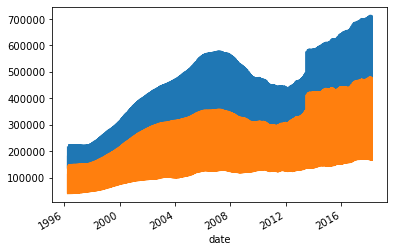

In [34]:
stationarity_check(chi['value'])

In [35]:
print('Results of Dicky-Fuller Test for Chicago: \n')
dftest = adfuller(chi['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

Results of Dicky-Fuller Test for Chicago: 

Test Statistic                    -3.197103
p-value                            0.020153
#Lags Used                        39.000000
Number of Observations Used    10618.000000
Critical Value (1%)               -3.430966
Critical Value (5%)               -2.861812
Critical Value (10%)              -2.566915
dtype: float64


Results of Dickey-Fuller Test: 

Test Statistic                  -128.146023
p-value                            0.000000
#Lags Used                         5.000000
Number of Observations Used    99994.000000
Critical Value (1%)               -3.430415
Critical Value (5%)               -2.861569
Critical Value (10%)              -2.566785
dtype: float64


(-128.1460233363382,
 0.0,
 5,
 99994,
 {'1%': -3.430415398602696,
  '5%': -2.861568905157775,
  '10%': -2.566785385204029},
 2753547.723144757)

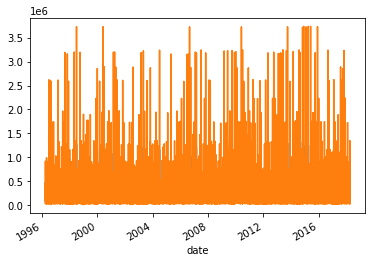

In [36]:
# doing this on only 100,000 data points from the original df because I don't want to break my computer again
sample_df = df.sample(frac=1)
stationarity_check(sample_df['value'][:100000])

### More sandboxing with Chicago

In [37]:
chi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10658 entries, 1996-04-01 to 2018-04-01
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   zipcode    10658 non-null  int64  
 1   state      10658 non-null  object 
 2   city       10658 non-null  object 
 3   metro      10658 non-null  object 
 4   size_rank  10658 non-null  int64  
 5   county     10658 non-null  object 
 6   roi        10600 non-null  float64
 7   cv         10658 non-null  float64
 8   mean       10658 non-null  float64
 9   median     10658 non-null  float64
 10  std        10658 non-null  float64
 11  value      10658 non-null  float64
 12  year       10658 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 1.5+ MB


In [38]:
chi.head()

,zipcode,state,city,metro,size_rank,county,roi,cv,mean,median,std,value,year
date,,,,,,,,,,,,,
1996-04-01,60657,IL,Chicago,Chicago,1,Cook,2.083782,0.256487,743978.867925,775600.0,190821.103965,334200.0,1996
1996-04-01,60614,IL,Chicago,Chicago,4,Cook,1.623971,0.237364,974139.245283,1006300.0,231225.944628,498100.0,1996
1996-04-01,60640,IL,Chicago,Chicago,8,Cook,2.615704,0.302850,553078.867925,585900.0,167499.870439,216500.0,1996
1996-04-01,60647,IL,Chicago,Chicago,17,Cook,2.832111,0.332313,293135.471698,302500.0,97412.855511,122700.0,1996
1996-04-01,60618,IL,Chicago,Chicago,20,Cook,2.255961,0.303729,316441.132075,328900.0,96112.225708,142600.0,1996


In [39]:
chi_years = chi.groupby('date').mean()

In [40]:
chi_years.set_index('year')

,zipcode,size_rank,roi,cv,mean,median,std,value
year,,,,,,,,
1996.0,60633.650000,1295.550000,1.411592,0.262096,340033.490566,349265.000000,88769.487314,176757.500000
1996.0,60633.650000,1295.550000,1.411592,0.262096,340033.490566,349265.000000,88769.487314,177220.000000
1996.0,60633.650000,1295.550000,1.411592,0.262096,340033.490566,349265.000000,88769.487314,177500.000000
1996.0,60633.650000,1295.550000,1.411592,0.262096,340033.490566,349265.000000,88769.487314,177560.000000
1996.0,60633.650000,1295.550000,1.411592,0.262096,340033.490566,349265.000000,88769.487314,177435.000000
...,...,...,...,...,...,...,...,...
2017.0,60633.097561,1266.536585,1.411592,0.256854,365474.347398,373896.341463,88194.848716,474153.658537
2018.0,60633.097561,1266.536585,1.411592,0.256854,365474.347398,373896.341463,88194.848716,476026.829268
2018.0,60633.097561,1266.536585,1.411592,0.256854,365474.347398,373896.341463,88194.848716,477909.756098


In [41]:
chi_years.groupby('year')

In [42]:
chi_years.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   zipcode    265 non-null    float64
 1   size_rank  265 non-null    float64
 2   roi        265 non-null    float64
 3   cv         265 non-null    float64
 4   mean       265 non-null    float64
 5   median     265 non-null    float64
 6   std        265 non-null    float64
 7   value      265 non-null    float64
 8   year       265 non-null    float64
dtypes: float64(9)
memory usage: 20.7 KB


In [43]:
year_groups = chi_years.groupby(pd.Grouper(freq='A'))

In [44]:
chi_annual = pd.DataFrame()

for yr, group in year_groups:
    chi_annual[yr.year] = group.values.ravel()
    
chi_annual.plot(figsize=(13,8),subplots=True,legend=True);

In [45]:
chi_mean = chi['value'].rolling(12).mean()
chi_std = chi['value'].rolling(12).std()

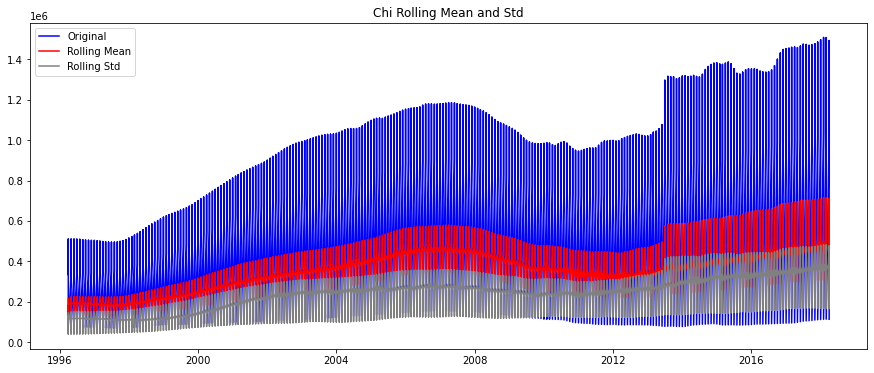

In [46]:
fig = plt.figure(figsize=(15,6))
plt.plot(chi['value'], color='blue',label='Original')
plt.plot(chi_mean, color='red',label='Rolling Mean')
plt.plot(chi_std, color='gray',label='Rolling Std')
plt.legend(loc='best')
plt.title('Chi Rolling Mean and Std')
plt.show();

### Random Walk

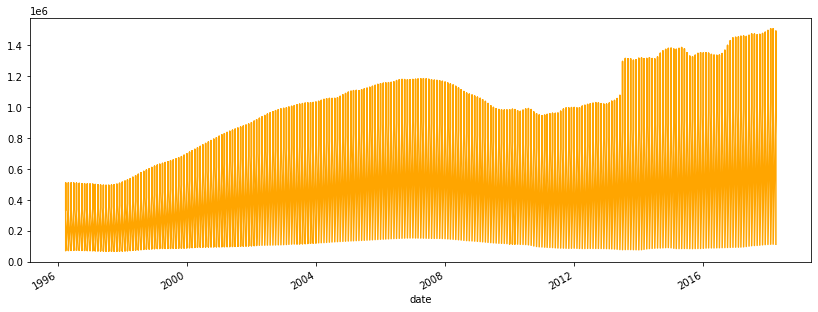

In [47]:
xr = chi
xr['value'].plot(figsize=(14,5), color='orange');

In [48]:
dates = pd.date_range('1996-04-01', '2018-04-01', freq='B')
len(dates)

5740

In [49]:
chi_values = np.random.normal(chi['value'].mean(), chi['value'].std(), len(dates))
chi_series = pd.Series(chi_values, index=dates)

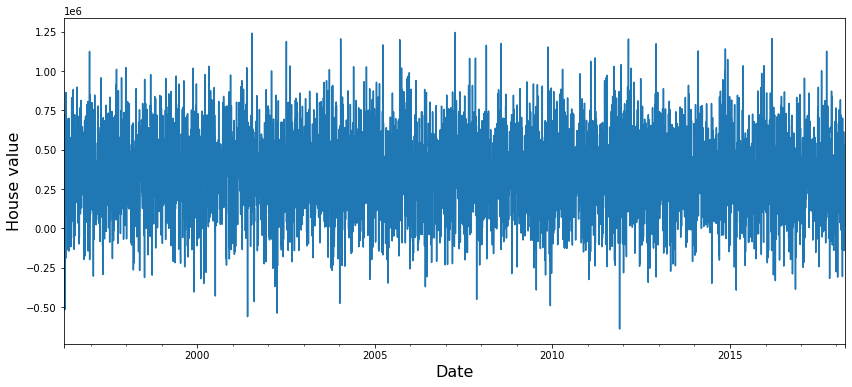

In [50]:
ax = chi_series.plot(figsize=(14,6))
ax.set_ylabel('House value', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
plt.show();

In [51]:
print(min(chi_values), '\n\n', max(chi_values))

-639084.2585740085 

 1244583.7912537574


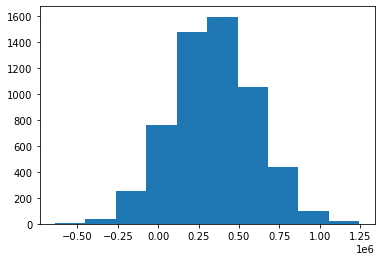

In [52]:
chi_series.hist(grid=False);

In [53]:
print(chi_series.mean(), '\n\n', chi_series.std())

342277.58086867566 

 256504.5788408694


In [54]:
error = np.random.normal(0, 10, len(dates))

def random_walk(start, error):
    Y_0 = start
    cum_error = np.cumsum(error)
    Y = cum_error + Y_0
    return Y

chi_house_values = random_walk(1000, error)

chi_house_series = pd.Series(chi_house_values, index=dates)

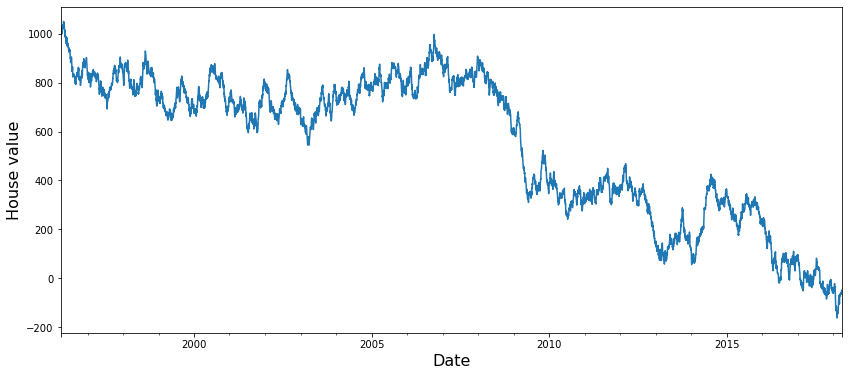

In [55]:
ax = chi_house_series.plot(figsize=(14,6))
ax.set_ylabel('House value', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
plt.show();

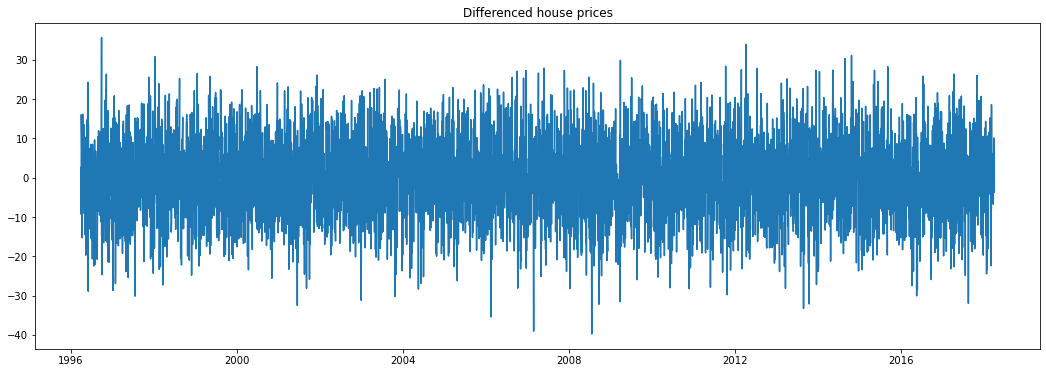

In [56]:
chi_diff = chi_house_series.diff(periods=1)

fig = plt.figure(figsize=(18,6))
plt.plot(chi_diff)
plt.title('Differenced house prices')
plt.show(block=False);

In [57]:
chi_house_values_drift = random_walk(1000, error)

chi_house_series_drift = pd.Series(chi_values, index=dates)

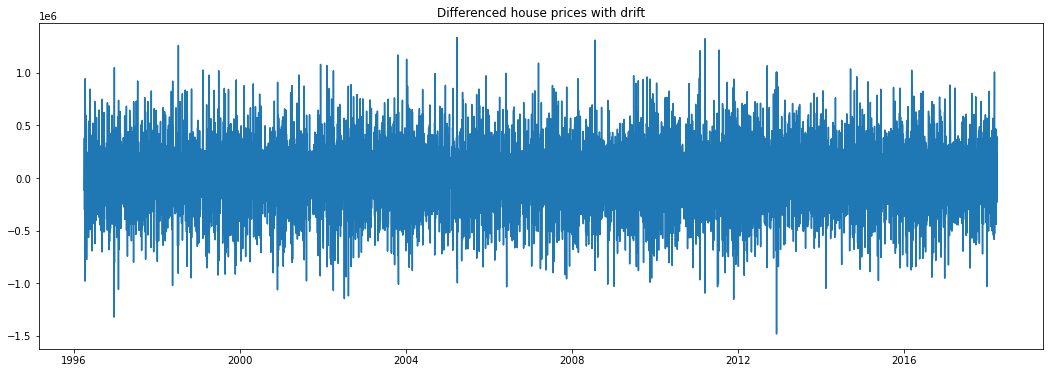

In [58]:
chi_drift_diff = chi_house_series_drift.diff(periods=1)

fig = plt.figure(figsize=(18,6))
plt.plot(chi_drift_diff)
plt.title('Differenced house prices with drift')
plt.show(block=False);

In [59]:
error = np.random.normal(0, 2, len(dates))
Y_0 = 8
mu = chi['value'].mean()
phi = .7

In [60]:
TS = [None] * len(dates)
y = Y_0
for i, row in enumerate(dates):
    TS[i] = mu + y * phi + error[i]
    y = TS[i] - mu

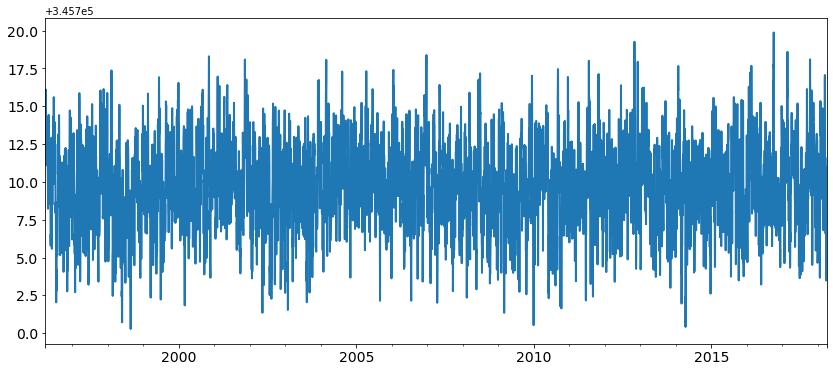

In [61]:
new_chi_series = pd.Series(TS, index=dates)
new_chi_series.plot(figsize=(14,6), linewidth=2, fontsize=14);

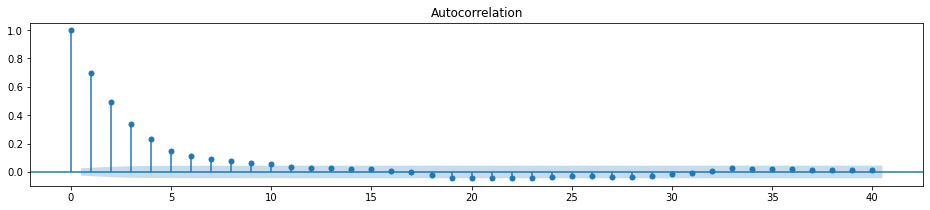

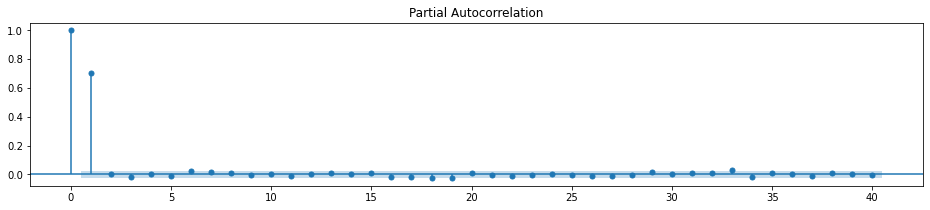

In [62]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(new_chi_series, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(new_chi_series, ax=ax, lags=40);

### ARMA

In [63]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
import warnings

# instantiate an AR(1) model to the simulated data
mod_arma = ARMA(new_chi_series, order=(1,0))
warnings.filterwarnings('ignore')

C:\Users\sethk\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [64]:
# fit the model
res_arma = mod_arma.fit()

In [65]:
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5740
Model:                     ARMA(1, 0)   Log Likelihood              -12062.882
Method:                       css-mle   S.D. of innovations              1.979
Date:                Tue, 05 Oct 2021   AIC                          24131.765
Time:                        00:15:23   BIC                          24151.730
Sample:                    04-01-1996   HQIC                         24138.714
                         - 03-30-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.457e+05      0.088   3.93e+06      0.000    3.46e+05    3.46e+05
ar.L1.y        0.7009      0.009     74.451      0.000       0.682       0.719
                                    Roots           

In [66]:
res_arma.params

const      345709.694612
ar.L1.y         0.700940
dtype: float64

In [67]:
np.random.seed(42)

error = np.random.normal(0, 4, len(dates))
theta = 0.9

TS = [None] * len(dates)
error_prev = error[0]
for i, row in enumerate(dates):
    TS[i] = mu + theta * error_prev + error[i]
    error_prev = error[i]

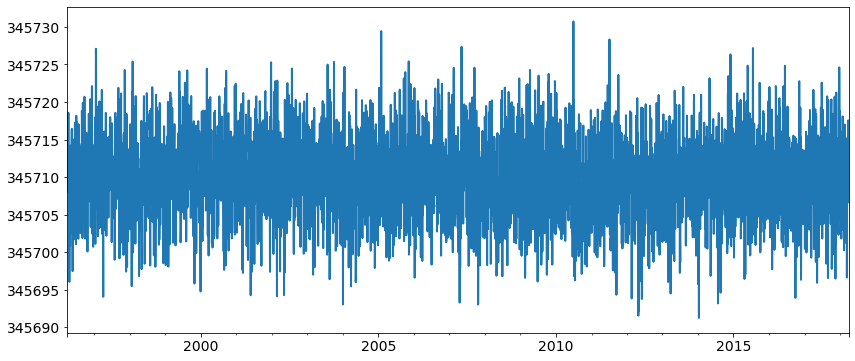

In [68]:
another_chi_series = pd.Series(TS, index=dates)

another_chi_series.plot(figsize=(14,6), linewidth=2, fontsize=14);

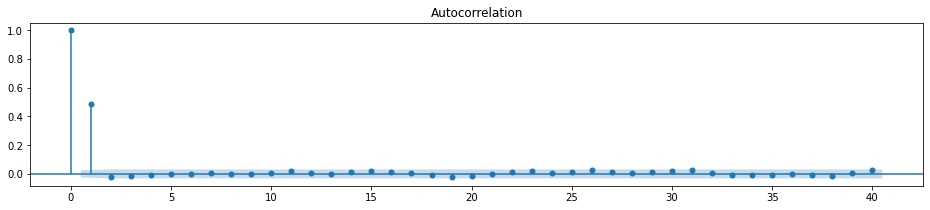

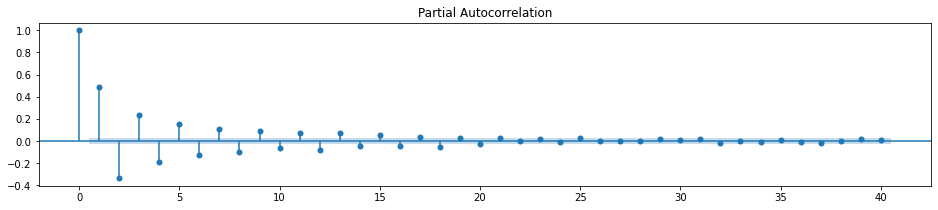

In [69]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(another_chi_series,ax=ax,lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(another_chi_series,ax=ax,lags=40);

In [70]:
# Instantiate and fit an MA(1) model to the simulated data
mod_arma = ARMA(another_chi_series, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5740
Model:                     ARMA(0, 1)   Log Likelihood              -16067.892
Method:                       css-mle   S.D. of innovations              3.976
Date:                Tue, 05 Oct 2021   AIC                          32141.785
Time:                        00:15:24   BIC                          32161.750
Sample:                    04-01-1996   HQIC                         32148.734
                         - 03-30-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.457e+05      0.100   3.44e+06      0.000    3.46e+05    3.46e+05
ma.L1.y        0.9057      0.006    162.073      0.000       0.895       0.917
                                    Roots           

In [71]:
print(res_arma.params)

const      345709.835211
ma.L1.y         0.905698
dtype: float64
